# Una imagen es una matriz

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

%matplotlib inline

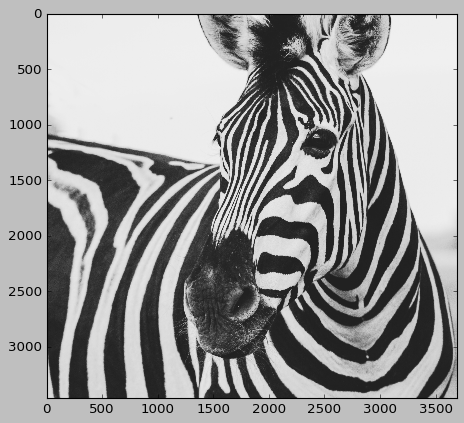

In [2]:
plt.style.use('classic')

imagen = Image.open(".//imagenes//imagen_ejemplo_frida_bredesen.jpg")

plt.imshow(imagen)

In [3]:
imagen_gr = imagen.convert('LA')
print(imagen_gr)

<PIL.Image.Image image mode=LA size=3693x3456 at 0x272315C7BB0>


In [4]:
imagen_mat = np.array(list(imagen_gr.getdata(band=0)), float)
print(imagen_mat)

[236. 236. 235. ... 195. 195. 193.]


In [5]:
imagen_mat.shape = (imagen_gr.size[1], imagen_gr.size[0])
print(imagen_mat)

[[236. 236. 235. ... 239. 239. 239.]
 [236. 236. 235. ... 239. 239. 239.]
 [236. 236. 235. ... 238. 238. 238.]
 ...
 [217. 216. 216. ... 197. 196. 194.]
 [216. 216. 216. ... 196. 195. 193.]
 [216. 216. 216. ... 195. 195. 193.]]


In [6]:
print(imagen_mat.shape)

(3456, 3693)


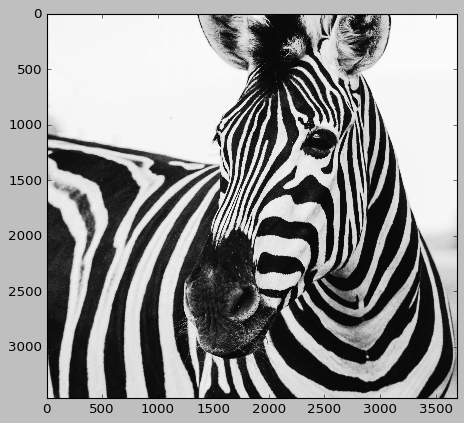

In [7]:
plt.imshow(imagen_mat, cmap = 'gray')
plt.show()

In [8]:
imagen_mat_2 = imagen_mat / 10
print(imagen_mat_2)

[[23.6 23.6 23.5 ... 23.9 23.9 23.9]
 [23.6 23.6 23.5 ... 23.9 23.9 23.9]
 [23.6 23.6 23.5 ... 23.8 23.8 23.8]
 ...
 [21.7 21.6 21.6 ... 19.7 19.6 19.4]
 [21.6 21.6 21.6 ... 19.6 19.5 19.3]
 [21.6 21.6 21.6 ... 19.5 19.5 19.3]]


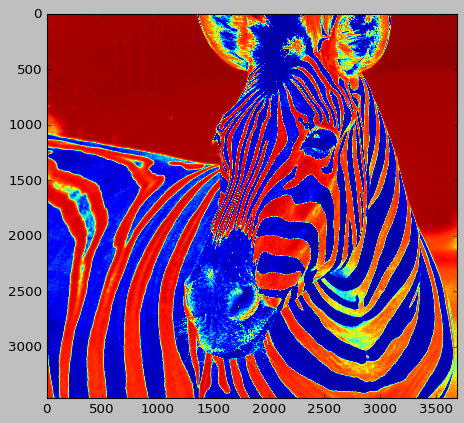

In [9]:
plt.imshow(imagen_mat_2)
plt.show()

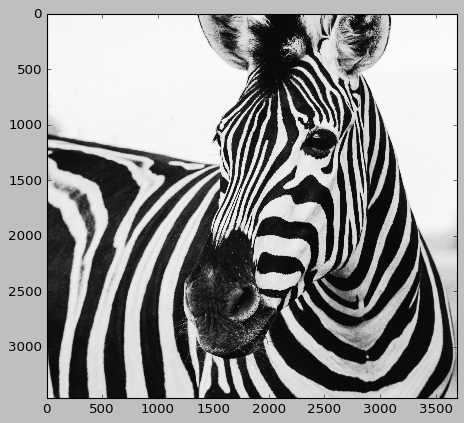

In [10]:
plt.imshow(imagen_mat_2, cmap = 'gray')
plt.show()

In [11]:
print(np.max(imagen_mat_2))
print(np.max(imagen_mat))

24.4
244.0


In [12]:
print(np.min(imagen_mat_2))
print(np.min(imagen_mat))

2.5
25.0


# Descomposición SVD a una imagen

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

%matplotlib inline

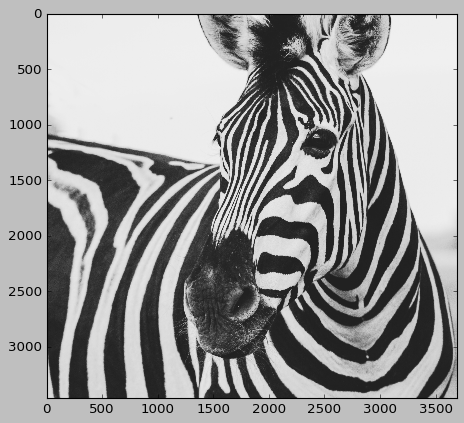

In [14]:
plt.style.use('classic')

imagen = Image.open(".//imagenes//imagen_ejemplo_frida_bredesen.jpg")

plt.imshow(imagen)

In [15]:
imagen_gr = imagen.convert('LA')

imagen_mat = np.array(list(imagen_gr.getdata(band=0)), float)

imagen_mat.shape = (imagen_gr.size[1], imagen_gr.size[0])

In [16]:
U, D, V = np.linalg.svd(imagen_mat)

In [17]:
print(imagen_mat.shape)
print(U.shape)
print(D.shape)
print(V.shape)

(3456, 3693)
(3456, 3456)
(3456,)
(3693, 3693)


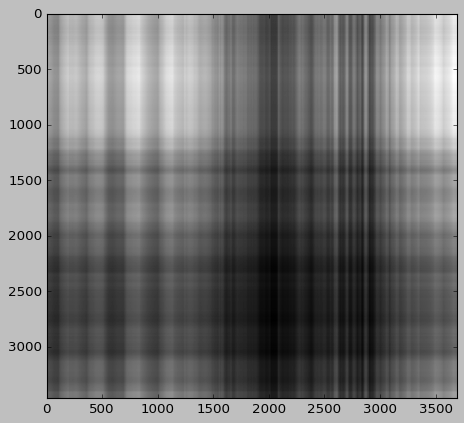

In [18]:
imagen_recons = np.matrix(U[:, : 1]) * np.diag(D[:1]) * np.matrix(V[:1, :])
plt.imshow(imagen_recons, cmap='gray')

### Buscando la cantidad de valores singulares que nos sirvan

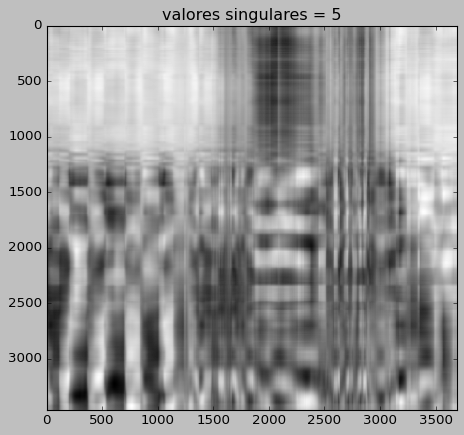

In [19]:
i = 5
imagen_recons = np.matrix(U[:, : i]) * np.diag(D[:i]) * np.matrix(V[:i, :])
plt.imshow(imagen_recons, cmap='gray')

titulo = "valores singulares = %s" % i

plt.title(titulo)
plt.show()

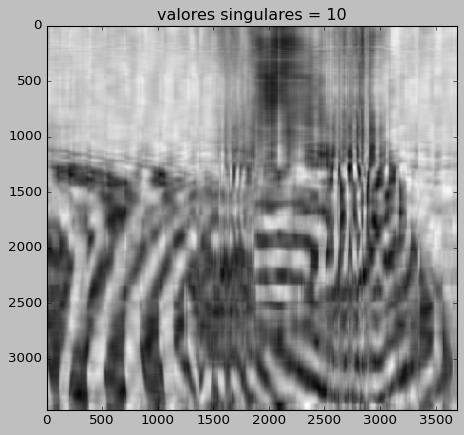

In [20]:
i = 10
imagen_recons = np.matrix(U[:, : i]) * np.diag(D[:i]) * np.matrix(V[:i, :])
plt.imshow(imagen_recons, cmap='gray')

titulo = "valores singulares = %s" % i

plt.title(titulo)
plt.show()

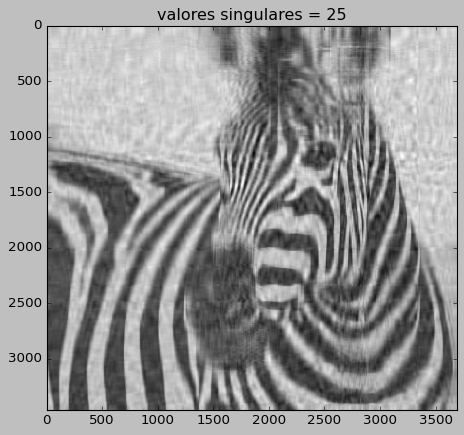

In [21]:
i = 25
imagen_recons = np.matrix(U[:, : i]) * np.diag(D[:i]) * np.matrix(V[:i, :])
plt.imshow(imagen_recons, cmap='gray')

titulo = "valores singulares = %s" % i

plt.title(titulo)
plt.show()

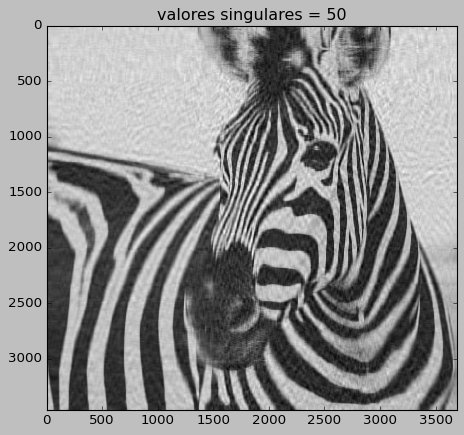

In [22]:
i = 50
imagen_recons = np.matrix(U[:, : i]) * np.diag(D[:i]) * np.matrix(V[:i, :])
plt.imshow(imagen_recons, cmap='gray')

titulo = "valores singulares = %s" % i

plt.title(titulo)
plt.show()

# Pseudo inversa de Moore Penrose

In [23]:
import numpy

#Numeros cercanos a 0 representados como 0
np.set_printoptions(suppress=True)

In [24]:
A = np.array([[2,3], [5,7], [11,13]])
print(A)

[[ 2  3]
 [ 5  7]
 [11 13]]


In [25]:
U, D, V = np.linalg.svd(A)
print("U:")
print(U)
print("")
print("D:")
print(D)
print("")
print("V:")
print(V)

U:
[[-0.18499741 -0.47276624 -0.86154979]
 [-0.44249308 -0.74271297  0.50257071]
 [-0.87748267  0.4742041  -0.07179582]]

D:
[19.40321383  0.71783924]

V:
[[-0.63055377 -0.77614557]
 [ 0.77614557 -0.63055377]]


In [26]:
D_pse = np.zeros((A.shape[0], A.shape[1])).T
print(D_pse)

[[0. 0. 0.]
 [0. 0. 0.]]


In [27]:
print("Valores a reemplazar en D_pse")
print(D_pse[:D.shape[0], :D.shape[0]])

Valores a reemplazar en D_pse
[[0. 0.]
 [0. 0.]]


In [28]:
print("Valores que pondremos en D_pse")
print(np.linalg.inv(np.diag(D)))

Valores que pondremos en D_pse
[[0.05153785 0.        ]
 [0.         1.39306957]]


In [29]:
print("D_pse")
D_pse[:D.shape[0], :D.shape[0]] = np.linalg.inv(np.diag(D))
print(D_pse)

D_pse
[[0.05153785 0.         0.        ]
 [0.         1.39306957 0.        ]]


In [30]:
A_pse = V.T.dot(D_pse).dot(U.T)
print(A_pse)

[[-0.50515464 -0.78865979  0.54123711]
 [ 0.42268041  0.67010309 -0.3814433 ]]


In [31]:
A_pse_calc = np.linalg.pinv(A)
print(A_pse_calc)

[[-0.50515464 -0.78865979  0.54123711]
 [ 0.42268041  0.67010309 -0.3814433 ]]


In [32]:
print(A_pse.dot(A))

[[ 1. -0.]
 [ 0.  1.]]


In [33]:
np.set_printoptions(suppress=False)

In [34]:
print(A_pse.dot(A))

[[ 1.00000000e+00 -1.77635684e-15]
 [ 4.44089210e-16  1.00000000e+00]]


In [35]:
#La pseudo inversa no es conmutativa
print(A.dot(A_pse))

[[ 0.25773196  0.43298969 -0.06185567]
 [ 0.43298969  0.74742268  0.03608247]
 [-0.06185567  0.03608247  0.99484536]]


In [36]:
A_pse_2 = np.linalg.inv(A.T.dot(A)).dot(A.T)
print(A_pse_2)

[[-0.50515464 -0.78865979  0.54123711]
 [ 0.42268041  0.67010309 -0.3814433 ]]


In [37]:
print(A_pse)

[[-0.50515464 -0.78865979  0.54123711]
 [ 0.42268041  0.67010309 -0.3814433 ]]


# Usando la Pseudoinversa

In [38]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

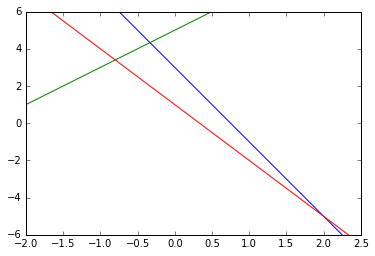

In [39]:
x = np.linspace(-5, 5, 1000)

y_1 = -4*x + 3
y_2 = 2*x + 5
y_3 = -3*x + 1

plt.plot(x, y_1)
plt.plot(x, y_2)
plt.plot(x, y_3)

plt.xlim(-2, 2.5)
plt.ylim(-6, 6)

plt.show()

In [40]:
matriz = np.array([[4,1], [-2,1], [3,1]])
print(matriz)

[[ 4  1]
 [-2  1]
 [ 3  1]]


In [41]:
matriz_pse = np.linalg.pinv(matriz)
print(matriz_pse)

[[ 0.11290323 -0.17741935  0.06451613]
 [ 0.14516129  0.62903226  0.22580645]]


In [42]:
b = np.array([[3],[5],[1]])
print(b)

[[3]
 [5]
 [1]]


In [43]:
resultado = matriz_pse.dot(b)
print(resultado)

[[-0.48387097]
 [ 3.80645161]]


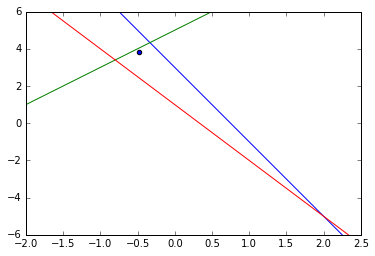

In [44]:
plt.plot(x, y_1)
plt.plot(x, y_2)
plt.plot(x, y_3)

plt.xlim(-2, 2.5)
plt.ylim(-6, 6)

plt.scatter(resultado[0], resultado[1])

plt.show()